In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/ENGG_680_IMU_Project/IMU-FALL

/content/drive/MyDrive/ENGG_680_IMU_Project/IMU-FALL


In [4]:
"""
Note: When running this cell it will prompt you to add a file named kaggle.json in order to proceed and download
the dataset directly from kaggle. Just make a kaggle account, go to account settings, then click "Create New Token".
It will download a file called kaggle.json which you will add to the prompt below. The dataset will then install.
"""
!pip install -q kaggle

# Upload the kaggle.json file
from google.colab import files
files.upload()  # This will prompt you to upload your kaggle.json file

# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions to secure the API key

# Download the SisFall dataset using the Kaggle API
!kaggle datasets download -d nvnikhil0001/sis-fall-original-dataset -p /content;

# Unzip the dataset into a folder named 'sis-fall-original-dataset' in the Colab environment
!unzip /content/sis-fall-original-dataset.zip -d /content/sis-fall-original-dataset;



mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nvnikhil0001/sis-fall-original-dataset
License(s): unknown
 99% 225M/227M [00:11<00:00, 24.3MB/s]
100% 227M/227M [00:11<00:00, 21.4MB/s]
Archive:  /content/sis-fall-original-dataset.zip
  inflating: /content/sis-fall-original-dataset/SisFall_dataset/Readme.txt  
  inflating: /content/sis-fall-original-dataset/SisFall_dataset/SA01/D01_SA01_R01.txt  
  inflating: /content/sis-fall-original-dataset/SisFall_dataset/SA01/D02_SA01_R01.txt  
  inflating: /content/sis-fall-original-dataset/SisFall_dataset/SA01/D03_SA01_R01.txt  
  inflating: /content/sis-fall-original-dataset/SisFall_dataset/SA01/D04_SA01_R01.txt  
  inflating: /content/sis-fall-original-dataset/SisFall_dataset/SA01/D05_SA01_R01.txt  
  inflating: /content/sis-fall-original-dataset/SisFall_dataset/SA01/D05_SA01_R02.txt  
  inflating: /content/sis-fall-

In [9]:
#Contents of dataset
!ls /content/sis-fall-original-dataset/SisFall_dataset/

Readme.txt  SA04  SA08	SA12  SA16  SA20  SE01	SE05  SE09  SE13
SA01	    SA05  SA09	SA13  SA17  SA21  SE02	SE06  SE10  SE14
SA02	    SA06  SA10	SA14  SA18  SA22  SE03	SE07  SE11  SE15
SA03	    SA07  SA11	SA15  SA19  SA23  SE04	SE08  SE12  Supplementary.pdf


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.patches as patches
import os
import math

In [6]:
#Path to dataset
path = '/content/sis-fall-original-dataset/SisFall_dataset/'

l = os.listdir(path)  #Get the list of all directories and files in the dataset
l.sort()


f = []  #List for paths starting with 'F'
d = []  #List for paths starting with 'D'


for sub_fol in l[1:39]:  #Range to exclude .txt and .pdf file
    subfolder_path = os.path.join(path, sub_fol)  #Build the full path for the subfolder

    #Check if the entry is a directory
    if os.path.isdir(subfolder_path):
        for sub_sub_fol in os.listdir(subfolder_path):  #List all files in the subfolder
            path_ = os.path.join(subfolder_path, sub_sub_fol)  #Construct the full path
            if sub_sub_fol.startswith('F'):  #Check if the file starts with 'F'
                f.append(path_)  #Add to F list
            elif sub_sub_fol.startswith('D'):  #Check if the file starts with 'D'
                d.append(path_)  #Add to D list



In [ ]:
l

['Readme.txt',
 'SA01',
 'SA02',
 'SA03',
 'SA04',
 'SA05',
 'SA06',
 'SA07',
 'SA08',
 'SA09',
 'SA10',
 'SA11',
 'SA12',
 'SA13',
 'SA14',
 'SA15',
 'SA16',
 'SA17',
 'SA18',
 'SA19',
 'SA20',
 'SA21',
 'SA22',
 'SA23',
 'SE01',
 'SE02',
 'SE03',
 'SE04',
 'SE05',
 'SE06',
 'SE07',
 'SE08',
 'SE09',
 'SE10',
 'SE11',
 'SE12',
 'SE13',
 'SE14',
 'SE15',
 'Supplementary.pdf']

In [7]:
print(len(f))
print(len(d))

1798
2707


In [8]:
import pandas as pd
import math
from tqdm import tqdm  # Import tqdm for progress tracking
import os  # Import os for working with file paths

# List to collect all DataFrames
dataframes_F = []

# Use tqdm to wrap the iterable for progress tracking
for p, path in enumerate(tqdm(f, desc="Processing Files")):
    with open(path, 'r') as file:
        content = file.read()

    # Clean and process the content
    content = content.replace(' ', '').split(';\n')

    # Split each line by comma and filter out empty lines
    rows = [line.split(',') for line in content if line]

    # Convert to integers and append 1 to each row where 1 indicates fall
    rows = [[int(value) for value in row] + [1] for row in rows if row != ['']]

    # Calculate RMV and add a new column to the end
    rows = [
        row + [math.sqrt(row[0]**2 + row[1]**2 + row[2]**2)]
        for row in rows if row != []
    ]

    # Create a DataFrame for the current file
    df = pd.DataFrame(
        rows,
        columns=[
            'Acceleration in X axis for ADXL345',
            'Acceleration in Y axis for ADXL345',
            'Acceleration in Z axis for ADXL345',
            'Rotation in X axis for ITG3200',
            'Rotation in Y axis for ITG3200',
            'Rotation in Z axis for ITG3200',
            'Acceleration in X axis for MMA8451Q',
            'Acceleration in Y axis for MMA8451Q',
            'Acceleration in Z axis for MMA8451Q',
            'Fall',
            'SMV'
        ]
    )

    # Add a column with just the file name (after the last slash)
    df['Filename'] = os.path.basename(path)

    # Append the DataFrame to the list
    dataframes_F.append(df)

# Combine all DataFrames into one if needed later
# df_combined = pd.concat(dataframes, ignore_index=True)


Processing Files: 100%|██████████| 1798/1798 [01:09<00:00, 25.98it/s]


In [29]:
dataframes_F[0].head()


,Acceleration in X axis for ADXL345,Acceleration in Y axis for ADXL345,Acceleration in Z axis for ADXL345,Rotation in X axis for ITG3200,Rotation in Y axis for ITG3200,Rotation in Z axis for ITG3200,Acceleration in X axis for MMA8451Q,Acceleration in Y axis for MMA8451Q,Acceleration in Z axis for MMA8451Q,Fall,SMV,Filename
0,0,-255,-51,-212,169,116,-93,-972,-28,1,260.049995,F07_SA01_R02.txt
1,0,-254,-48,-220,195,103,-95,-970,-20,1,258.495648,F07_SA01_R02.txt
2,0,-255,-50,-226,221,93,-94,-969,-24,1,259.855729,F07_SA01_R02.txt
3,-4,-256,-41,-231,245,85,-100,-965,-9,1,259.293270,F07_SA01_R02.txt
4,0,-257,-39,-225,267,77,-105,-974,5,1,259.942301,F07_SA01_R02.txt


In [9]:
import pandas as pd
import math
from tqdm import tqdm  # Import tqdm for progress tracking
import os  # Import os for working with file paths

# Define the bit conversion function
def bit_conversion(raw_adc_value, max_range, bit_resolution):
    """
    Converts raw ADC value to a floating point value based on the range and bit resolution.

    :param raw_adc_value: Raw ADC value from the sensor
    :param max_range: The maximum range of the sensor (e.g., ±16g, ±8g, etc.)
    :param bit_resolution: The bit resolution of the ADC (e.g., 13, 14, 16)

    :return: Converted floating point value
    """
    # Calculate the maximum ADC value based on the bit resolution
    max_adc_value = 2**bit_resolution - 1

    # Convert the raw ADC value to a floating-point value
    converted_value = (raw_adc_value / max_adc_value) * max_range

    return converted_value

# List to collect all DataFrames
dataframes_F = []

# Use tqdm to wrap the iterable for progress tracking
for p, path in enumerate(tqdm(f, desc="Processing Files")):
    with open(path, 'r') as file:
        content = file.read()

    # Clean and process the content
    content = content.replace(' ', '').split(';\n')

    # Split each line by comma and filter out empty lines
    rows = [line.split(',') for line in content if line]

    # Convert to integers and append 1 to each row where 1 indicates fall
    rows = [[int(value) for value in row] + [1] for row in rows if row != ['']]

    # Calculate SMV and add a new column to the end
    rows = [
        row
        + [math.sqrt(row[0]**2 + row[1]**2 + row[2]**2)]  # SMV for ADX345
        + [math.sqrt(row[6]**2 + row[7]**2 + row[8]**2)]  # SMV for MMA8451Q
        for row in rows if row != []
    ]

    # Create a DataFrame for the current file
    df = pd.DataFrame(
        rows,
        columns=[
            'Acceleration in X axis for ADXL345',
            'Acceleration in Y axis for ADXL345',
            'Acceleration in Z axis for ADXL345',
            'Rotation in X axis for ITG3200',
            'Rotation in Y axis for ITG3200',
            'Rotation in Z axis for ITG3200',
            'Acceleration in X axis for MMA8451Q',
            'Acceleration in Y axis for MMA8451Q',
            'Acceleration in Z axis for MMA8451Q',
            'Fall',
            'SMV',
            'SMV_MMA',
        ]
    )

    # Add a column with just the file name (after the last slash)
    df['Filename'] = os.path.basename(path)

    # Apply bit conversion to the respective columns
    df["Acceleration in X axis for ADXL345"] = df["Acceleration in X axis for ADXL345"].apply(bit_conversion, args=(16, 13))
    df["Acceleration in Y axis for ADXL345"] = df["Acceleration in Y axis for ADXL345"].apply(bit_conversion, args=(16, 13))
    df["Acceleration in Z axis for ADXL345"] = df["Acceleration in Z axis for ADXL345"].apply(bit_conversion, args=(16, 13))

    df["Rotation in X axis for ITG3200"] = df["Rotation in X axis for ITG3200"].apply(bit_conversion, args=(2000, 16))
    df["Rotation in Y axis for ITG3200"] = df["Rotation in Y axis for ITG3200"].apply(bit_conversion, args=(2000, 16))
    df["Rotation in Z axis for ITG3200"] = df["Rotation in Z axis for ITG3200"].apply(bit_conversion, args=(2000, 16))

    df["Acceleration in X axis for MMA8451Q"] = df["Acceleration in X axis for MMA8451Q"].apply(bit_conversion, args=(8, 14))
    df["Acceleration in Y axis for MMA8451Q"] = df["Acceleration in Y axis for MMA8451Q"].apply(bit_conversion, args=(8, 14))
    df["Acceleration in Z axis for MMA8451Q"] = df["Acceleration in Z axis for MMA8451Q"].apply(bit_conversion, args=(8, 14))

    # Append the DataFrame to the list
    dataframes_F.append(df)

# Combine all DataFrames into one if needed later
# df_combined = pd.concat(dataframes, ignore_index=True)


import pandas as pd
import math
from tqdm import tqdm  # Import tqdm for progress tracking
import os  # Import os for working with file paths


# List to collect all DataFrames
dataframes_D = []

# Use tqdm to wrap the iterable for progress tracking
for p, path in enumerate(tqdm(d, desc="Processing Files")):
    with open(path, 'r') as file:
        content = file.read()

    # Clean and process the content
    content = content.replace(' ', '').split(';\n')

    # Split each line by comma and filter out empty lines
    rows = [line.split(',') for line in content if line]

    # Convert to integers and append 1 to each row where 1 indicates fall
    rows = [[int(value) for value in row] + [1] for row in rows if row != ['']]

    # Calculate SMV and add a new column to the end
    rows = [
        row
        + [math.sqrt(row[0]**2 + row[1]**2 + row[2]**2)]  # SMV for ADX345
        + [math.sqrt(row[6]**2 + row[7]**2 + row[8]**2)]  # SMV for MMA8451Q
        for row in rows if row != []
    ]

    # Create a DataFrame for the current file
    df = pd.DataFrame(
        rows,
        columns=[
            'Acceleration in X axis for ADXL345',
            'Acceleration in Y axis for ADXL345',
            'Acceleration in Z axis for ADXL345',
            'Rotation in X axis for ITG3200',
            'Rotation in Y axis for ITG3200',
            'Rotation in Z axis for ITG3200',
            'Acceleration in X axis for MMA8451Q',
            'Acceleration in Y axis for MMA8451Q',
            'Acceleration in Z axis for MMA8451Q',
            'Fall',
            'SMV',
            'SMV_MMA'
        ]
    )

    # Add a column with just the file name (after the last slash)
    df['Filename'] = os.path.basename(path)

    # Apply bit conversion to the respective columns
    df["Acceleration in X axis for ADXL345"] = df["Acceleration in X axis for ADXL345"].apply(bit_conversion, args=(16, 13))
    df["Acceleration in Y axis for ADXL345"] = df["Acceleration in Y axis for ADXL345"].apply(bit_conversion, args=(16, 13))
    df["Acceleration in Z axis for ADXL345"] = df["Acceleration in Z axis for ADXL345"].apply(bit_conversion, args=(16, 13))

    df["Rotation in X axis for ITG3200"] = df["Rotation in X axis for ITG3200"].apply(bit_conversion, args=(2000, 16))
    df["Rotation in Y axis for ITG3200"] = df["Rotation in Y axis for ITG3200"].apply(bit_conversion, args=(2000, 16))
    df["Rotation in Z axis for ITG3200"] = df["Rotation in Z axis for ITG3200"].apply(bit_conversion, args=(2000, 16))

    df["Acceleration in X axis for MMA8451Q"] = df["Acceleration in X axis for MMA8451Q"].apply(bit_conversion, args=(8, 14))
    df["Acceleration in Y axis for MMA8451Q"] = df["Acceleration in Y axis for MMA8451Q"].apply(bit_conversion, args=(8, 14))
    df["Acceleration in Z axis for MMA8451Q"] = df["Acceleration in Z axis for MMA8451Q"].apply(bit_conversion, args=(8, 14))

    # Append the DataFrame to the list
    dataframes_D.append(df)

# Combine all DataFrames into one if needed later
# df_combined = pd.concat(dataframes, ignore_index=True)


Processing Files: 100%|██████████| 2707/2707 [04:43<00:00,  9.55it/s]


In [24]:
dataframes_D[0]

,Acceleration in X axis for ADXL345,Acceleration in Y axis for ADXL345,Acceleration in Z axis for ADXL345,Rotation in X axis for ITG3200,Rotation in Y axis for ITG3200,Rotation in Z axis for ITG3200,Acceleration in X axis for MMA8451Q,Acceleration in Y axis for MMA8451Q,Acceleration in Z axis for MMA8451Q,Fall,SMV,SMV_MMA,Filename
0,-0.001953,-0.503968,0.011720,-1.190204,1.159686,-0.457771,0.000488,-0.493194,0.072270,1,258.071695,1020.786462,D10_SA01_R05.txt
1,0.005860,-0.509828,0.013674,-1.098650,1.159686,-0.427253,-0.000977,-0.493194,0.073247,1,261.111087,1021.079821,D10_SA01_R05.txt
2,-0.003907,-0.503968,0.011720,-1.068132,1.159686,-0.488289,0.000977,-0.490264,0.072758,1,258.077508,1014.998030,D10_SA01_R05.txt
3,-0.001953,-0.503968,0.015627,-1.098650,1.190204,-0.457771,0.002442,-0.490753,0.072270,1,258.125938,1015.851367,D10_SA01_R05.txt
4,0.001953,-0.500061,0.001953,-1.159686,1.190204,-0.427253,0.000000,-0.492706,0.074712,1,256.003906,1020.534174,D10_SA01_R05.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.000000,-0.509828,-0.013674,-1.434348,0.823987,-0.305180,-0.002442,-0.491241,0.050296,1,261.093853,1011.271477,D10_SA01_R05.txt
2396,-0.003907,-0.507874,-0.009767,-1.495384,0.762951,-0.305180,-0.002442,-0.495147,0.047366,1,260.055763,1018.641252,D10_SA01_R05.txt
2397,-0.003907,-0.505921,-0.007813,-1.586938,0.732433,-0.305180,0.000000,-0.492218,0.047366,1,259.038607,1012.656408,D10_SA01_R05.txt
2398,0.001953,-0.503968,-0.007813,-1.678492,0.732433,-0.305180,-0.001953,-0.495147,0.049808,1,258.032944,1019.125115,D10_SA01_R05.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# IMU sampling rate
sample_fre=200

# Window Size
winsize=1

# feature length
feature_length=int(winsize*sample_fre)


In [26]:
features_f=[]
for dataframe_f in dataframes_F:
    SMVs= dataframe_f.loc[:,["SMV"]]

    # Find the index of the largest value
    max_index = SMVs.idxmax()

    # Get the actual integer index value
    max_index_value = max_index.iloc[0] #get the integer value of the index

    # Calculate start and end indices for the range
    start_index = max_index_value - int(feature_length/2)
    end_index =  max_index_value + int(feature_length/2)

    if end_index > len(dataframe_f) or start_index<0:
      break

    # Extract the range of rows
    centered_data = dataframe_f.loc[start_index:end_index, ["Acceleration in X axis for ADXL345","Acceleration in Y axis for ADXL345","Acceleration in Z axis for ADXL345","Filename"]]  # Extract rows using .loc

    # contact the data (xyz->xyz->xyz)

    # Reshape the extracted data and append to the features list
    feature_per_txt = centered_data[
        ["Acceleration in X axis for ADXL345", "Acceleration in Y axis for ADXL345", "Acceleration in Z axis for ADXL345"]
        ].values.reshape(1, -1)  # Reshape to (1, feature_length * 3)
    # features_f.append((feature_per_txt, 1,int(centered_data["Filename"].iloc[0][1:3])))  # Store feature and filename
    features_f.append((feature_per_txt, 1))

    # Now, 'features' contains a list of tuples: (feature_array, filename)

    # feature_per_txt=[]
    # for i in range(len(centered_data)):
    #     feature_per_txt.extend(centered_data.iloc[i,:3])


In [13]:
len(features_f)

1798

In [27]:
import random
features_d=[]
for dataframe_f in dataframes_F:

    # Get the total number of rows in the dataframe
    total_rows = len(dataframe_f)

    # Calculate a random start index within the allowed range
    start_index = random.randint(0, total_rows - feature_length)

    # Calculate the end index based on feature length
    end_index = start_index + feature_length

    # Extract the random range of rows
    centered_data = dataframe_f.loc[
        start_index:end_index,
        ["Acceleration in X axis for ADXL345", "Acceleration in Y axis for ADXL345", "Acceleration in Z axis for ADXL345", "Filename"]
    ]

    # contact the data (xyz->xyz->xyz)
    # Reshape the extracted data and append to the features list
    feature_per_txt = centered_data[
        ["Acceleration in X axis for ADXL345", "Acceleration in Y axis for ADXL345", "Acceleration in Z axis for ADXL345"]
        ].values.reshape(1, -1)  # Reshape to (1, feature_length * 3)
    # features_d.append((feature_per_txt, 0,int(centered_data["Filename"].iloc[0][1:3])))  # Store feature and filename
    features_d.append((feature_per_txt, 0))


In [19]:
#Code for validation on second IMU:
#********************************


features_f_validate_MMA=[]
for dataframe_f in dataframes_F:
    SMVs= dataframe_f.loc[:,["SMV_MMA"]]

    # Find the index of the largest value
    max_index = SMVs.idxmax()

    # Get the actual integer index value
    max_index_value = max_index.iloc[0] #get the integer value of the index

    # Calculate start and end indices for the range
    start_index = max_index_value - int(feature_length/2)
    end_index =  max_index_value + int(feature_length/2)

    if end_index > len(dataframe_f) or start_index<0:
      break

    # Extract the range of rows
    centered_data = dataframe_f.loc[start_index:end_index, ["Acceleration in X axis for MMA8451Q","Acceleration in Y axis for MMA8451Q","Acceleration in Z axis for MMA8451Q","Filename"]]  # Extract rows using .loc

    # contact the data (xyz->xyz->xyz)

    # Reshape the extracted data and append to the features list
    feature_per_txt = centered_data[
        ["Acceleration in X axis for MMA8451Q", "Acceleration in Y axis for MMA8451Q", "Acceleration in Z axis for MMA8451Q"]
        ].values.reshape(1, -1)  # Reshape to (1, feature_length * 3)
    # features_f.append((feature_per_txt, 1,int(centered_data["Filename"].iloc[0][1:3])))  # Store feature and filename
    features_f_validate_MMA.append((feature_per_txt, 1))

    # Now, 'features' contains a list of tuples: (feature_array, filename)

    # feature_per_txt=[]
    # for i in range(len(centered_data)):
    #     feature_per_txt.extend(centered_data.iloc[i,:3])

In [28]:
import random
features_d_validate_MMA=[]
for dataframe_f in dataframes_F:

    # Get the total number of rows in the dataframe
    total_rows = len(dataframe_f)

    # Calculate a random start index within the allowed range
    start_index = random.randint(0, total_rows - feature_length)

    # Calculate the end index based on feature length
    end_index = start_index + feature_length

    # Extract the random range of rows
    centered_data = dataframe_f.loc[
        start_index:end_index,
        ["Acceleration in X axis for ADXL345", "Acceleration in Y axis for ADXL345", "Acceleration in Z axis for ADXL345", "Filename"]
    ]

    # contact the data (xyz->xyz->xyz)
    # Reshape the extracted data and append to the features list
    feature_per_txt = centered_data[
        ["Acceleration in X axis for ADXL345", "Acceleration in Y axis for ADXL345", "Acceleration in Z axis for ADXL345"]
        ].values.reshape(1, -1)  # Reshape to (1, feature_length * 3)
    # features_d.append((feature_per_txt, 0,int(centered_data["Filename"].iloc[0][1:3])))  # Store feature and filename
    features_d_validate_MMA.append((feature_per_txt, 0))

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import sklearn.metrics as metrics
from torch.utils.data import DataLoader, TensorDataset


# Define the CNN architecture
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()

        # Convolutional feature extraction layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(1, 5), stride=(1, 2), padding=(0, 2))
        self.norm1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(kernel_size=(1, 5), stride=(1, 1))

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(1, 5), stride=(1, 2), padding=(0, 2))
        self.norm2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=(1, 5), stride=(1, 1))

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1, 5), stride=(1, 2), padding=(0, 2))
        self.norm3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(kernel_size=(1, 5), stride=(1, 1))

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1, 5), stride=(1, 2), padding=(0, 2))
        self.norm4 = nn.BatchNorm2d(128)
        self.pool4 = nn.MaxPool2d(kernel_size=(1, 5), stride=(1, 1))

        # Fully connected layers for classification
        self.fc1 = nn.Linear(3968, 128)
        self.fc2 = nn.Linear(128, 2)  # Assuming 10 classes for classification

    def forward(self, x):
        x = self.pool1(F.relu(self.norm1(self.conv1(x))))
        x = self.pool2(F.relu(self.norm2(self.conv2(x))))
        x = self.pool3(F.relu(self.norm3(self.conv3(x))))
        x = self.pool4(F.relu(self.norm4(self.conv4(x))))

        # Flatten for fully connected layers
        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.softmax(x, dim=1)



def train_model(model, criterion, optimizer, num_epochs, val_data,scheduler):

    best_val_loss = float('inf')  # Initialize with a very large value
    patience = 3  # Number of epochs to wait before stopping
    epochs_without_improvement = 0


    for epoch in range(num_epochs):
        train_loss = 0.0  # Accumulate training loss
        num_batches = 0

        for inputs_train, labels_train in train_loader:

            # Zero the parameter gradients
            optimizer.zero_grad()

             # Reshape inputs_train to add a channel dimension
            inputs_train = inputs_train.unsqueeze(1)
            inputs_train = inputs_train.unsqueeze(-2)   # Add channel dimension
            # print(inputs_train.shape)

            #(Batch Size, Channels, Height, Width)
            # 当前的特征是 [32,604]这表示你有 32 个样本（batch size），
            # 每个样本有 604 维特征，但这并不符合 nn.Conv2d 的输入要求。
            #为了正确使用 nn.Conv2d，你需要将你的输入调整为四维张量。
            #(Batch Size, Channels, Height, Width)=(32,1,1,604)
            #这表示每个样本有一个通道，高度为 1，宽度为 604。


            # Forward pass
            outputs_train = model(inputs_train)

            # Calculate loss
            loss_train = criterion(outputs_train, labels_train)
            train_loss += loss_train.item()  # Accumulate loss

            # Backward pass
            loss_train.backward()
            optimizer.step()

        # Calculate average training loss for the epoch
        avg_train_loss = train_loss / len(train_loader)

        # Calculate validation loss for the epoch
        val_loss = 0.0
        with torch.no_grad():
            for inputs_val, labels_val in val_loader:
                inputs_val = inputs_val.unsqueeze(1)
                inputs_val = inputs_val.unsqueeze(-2)
                outputs_val = model(inputs_val)
                loss_val = criterion(outputs_val, labels_val)
                val_loss += loss_val.item()

        avg_val_loss = val_loss / len(val_loader)

        # Adjust learning rate using the scheduler
        scheduler.step(avg_val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss_train: {avg_train_loss:.4f}, Loss_val: {avg_val_loss:.4f}")

        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
              print("Early stopping triggered.")

              break


#The error arises because the input to nn.Conv2d expects a 4-dimensional
#tensor in the format: [batch_size, channels, height, width].
#The code adds a channel dimension by calling inputs_train = inputs_train.unsqueeze(1)
#but this results in a tensor with dimensions [batch_size, channels, feature_length]. The missing dimension is the height which is required by nn.Conv2d and nn.BatchNorm2d.


In [30]:
# Training function with confusion matrix calculation
from sklearn.metrics import confusion_matrix, classification_report
def evaluate_model(model, loader):
    """Evaluate the model and compute the confusion matrix."""
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in loader:
            # Add channel and spatial dimensions
            inputs = inputs.unsqueeze(1).unsqueeze(-2)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            # 参数 1 (outputs): 这是模型的输出张量。
            # 参数 2 (dim=1): 指定沿哪个维度找最大值。
            # dim=1 表示在每一行中找最大值（即在类别维度上）。
            # 每行对应一个样本，每列对应一个类别。

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())


    # Calculate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    # print("Confusion Matrix:",precision=4)
    # print(cm)

    # # Optional: Display additional metrics
    # print("\nClassification Report:")
    # print(classification_report(all_labels, all_preds))

    # Format the confusion matrix with desired precision using numpy
    formatted_cm = np.array2string(cm, precision=4)  # Format with precision=4

    print("Confusion Matrix:")
    print(formatted_cm)  # Print the formatted matrix

    # Optional: Display additional metrics
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))


    return cm

In [53]:
# get 60 % training data, 20% validation data and 20% test data
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import sklearn.metrics as metrics
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import random_split


features = features_f + features_d
random.shuffle(features)

train_size = int(0.6 * len(features))
val_size = int(0.2 * len(features))
test_size = len(features) - train_size - val_size

train_data = features[:train_size]
test_data = features[train_size:train_size+test_size]
val_data = features[train_size+test_size:]


# Define batch size
batch_size =32

# Create a dataset and data loader for training
train_inputs = [data[0] for data in train_data]
train_labels = [data[1] for data in train_data]

train_inputs = torch.tensor(np.vstack(train_inputs), dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)

# Create a DataLoader for training data
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)


# Separate inputs and labels from val_data
val_inputs = [data[0] for data in val_data]
val_labels = [data[1] for data in val_data]

# Convert to tensors
val_inputs = torch.tensor(np.vstack(val_inputs), dtype=torch.float32)  # Stack and convert to tensor
val_labels = torch.tensor(val_labels, dtype=torch.long)

val_dataset = TensorDataset(val_inputs, val_labels)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# for test data
test_inputs = [data[0] for data in test_data]
test_labels = [data[1] for data in test_data]

test_inputs = torch.tensor(np.vstack(test_inputs), dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

test_dataset = TensorDataset(test_inputs, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)




In [57]:
# get 80 % training data,20% test data and another IMU for validation
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import sklearn.metrics as metrics
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import random_split


features = features_f + features_d
features = features_f_validate_MMA+features

random.shuffle(features)

train_size = int(0.8 * len(features))
val_size = int(0.2 * len(features))
test_size = len(features) - train_size - val_size

train_data = features[:train_size]
test_data = features[train_size:train_size+test_size]
val_data = features[train_size+test_size:]


# Define batch size
batch_size =32

# Create a dataset and data loader for training
train_inputs = [data[0] for data in train_data]
train_labels = [data[1] for data in train_data]

train_inputs = torch.tensor(np.vstack(train_inputs), dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)

# Create a DataLoader for training data
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Separate inputs and labels from val_data
val_inputs = [data[0] for data in val_data]
val_labels = [data[1] for data in val_data]

# Convert to tensors
val_inputs = torch.tensor(np.vstack(val_inputs), dtype=torch.float32)  # Stack and convert to tensor
val_labels = torch.tensor(val_labels, dtype=torch.long)

val_dataset = TensorDataset(val_inputs, val_labels)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# for test data
test_inputs = [data[0] for data in test_data]
test_labels = [data[1] for data in test_data]

test_inputs = torch.tensor(np.vstack(test_inputs), dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

test_dataset = TensorDataset(test_inputs, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)




In [58]:
model=CustomCNN()
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()

model.train()
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Adaptive learning rate scheduler (ReduceLROnPlateau)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

num_epochs = 50

train_model(model, criterion, optimizer, num_epochs, val_data,scheduler)

evaluate_model(model, val_loader)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/50], Loss_train: 0.4778, Loss_val: 0.4597
Epoch [2/50], Loss_train: 0.4546, Loss_val: 0.4558
Epoch [3/50], Loss_train: 0.4520, Loss_val: 0.4533
Epoch [4/50], Loss_train: 0.4503, Loss_val: 0.4517
Epoch [5/50], Loss_train: 0.4493, Loss_val: 0.4504
Epoch [6/50], Loss_train: 0.4488, Loss_val: 0.4496
Epoch [7/50], Loss_train: 0.4482, Loss_val: 0.4490
Epoch [8/50], Loss_train: 0.4478, Loss_val: 0.4486
Epoch [9/50], Loss_train: 0.4474, Loss_val: 0.4483
Epoch [10/50], Loss_train: 0.4473, Loss_val: 0.4479
Epoch [11/50], Loss_train: 0.4470, Loss_val: 0.4478
Epoch [12/50], Loss_train: 0.4466, Loss_val: 0.4478
Epoch [13/50], Loss_train: 0.4465, Loss_val: 0.4476
Epoch [14/50], Loss_train: 0.4463, Loss_val: 0.4475
Epoch [15/50], Loss_train: 0.4463, Loss_val: 0.4473
Epoch [16/50], Loss_train: 0.4462, Loss_val: 0.4470
Epoch [17/50], Loss_train: 0.4459, Loss_val: 0.4470
Epoch [18/50], Loss_train: 0.4458, Loss_val: 0.4468
Epoch [19/50], Loss_train: 0.4457, Loss_val: 0.4468
Epoch [20/50], Loss_t

array([[350,   9],
       [  2, 717]])

In [59]:
evaluate_model(model, test_loader)
evaluate_model(model, val_loader)
evaluate_model(model, train_loader)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Confusion Matrix:
[[1]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[350   9]
 [  2 717]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       359
           1       0.99      1.00      0.99       719

    accuracy                           0.99      1078
   macro avg       0.99      0.99      0.99      1078
weighted avg       0.99      0.99      0.99      1078

Confusion Matrix:
[[1405   34]
 [   2 2874]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1439
           1       0.99      1.00      0.99      2876

    accuracy                           0.99      4315


array([[1405,   34],
       [   2, 2874]])

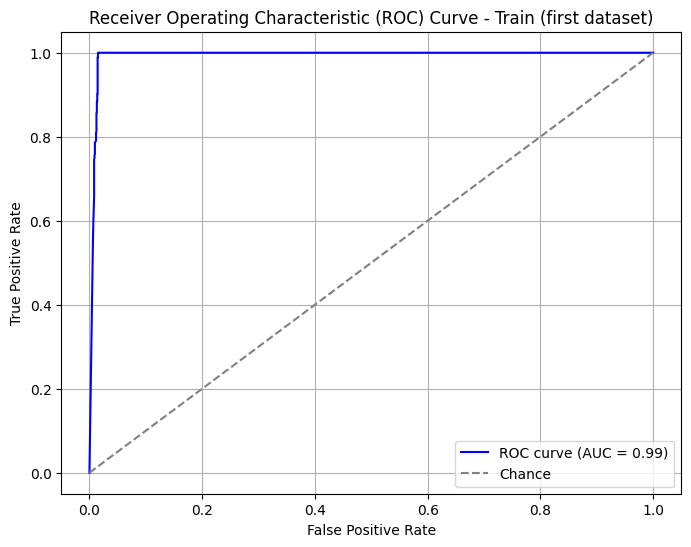

In [51]:
#create the receiver operating characteristic (ROC) curve
from sklearn.metrics import roc_curve, auc

all_probs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in train_loader:
        #print(labels)
        inputs = inputs.unsqueeze(1).unsqueeze(-2)  # Add channel and spatial dimensions

        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Get probabilities for positive class

        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Train (first dataset)')
#plt.title('Receiver Operating Characteristic (ROC) Curve - Train (second dataset)')

plt.legend(loc='lower right')
plt.grid()
plt.show()


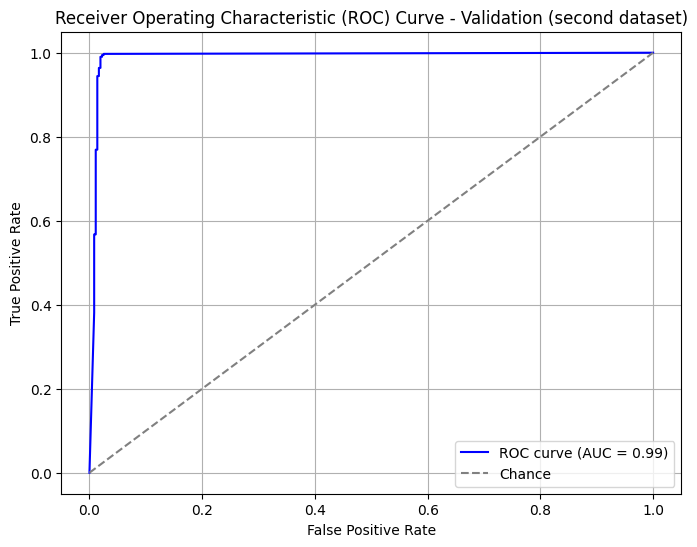

In [61]:
all_probs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
    #for inputs, labels in test_loader:
        inputs = inputs.unsqueeze(1).unsqueeze(-2)  # Add channel and spatial dimensions

        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Get probabilities for positive class

        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve - Test (first dataset)')
#plt.title('Receiver Operating Characteristic (ROC) Curve - Validation (first dataset)')
#plt.title('Receiver Operating Characteristic (ROC) Curve - Test (second dataset)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation (second dataset)')

plt.legend(loc='lower right')
plt.grid()
plt.show()


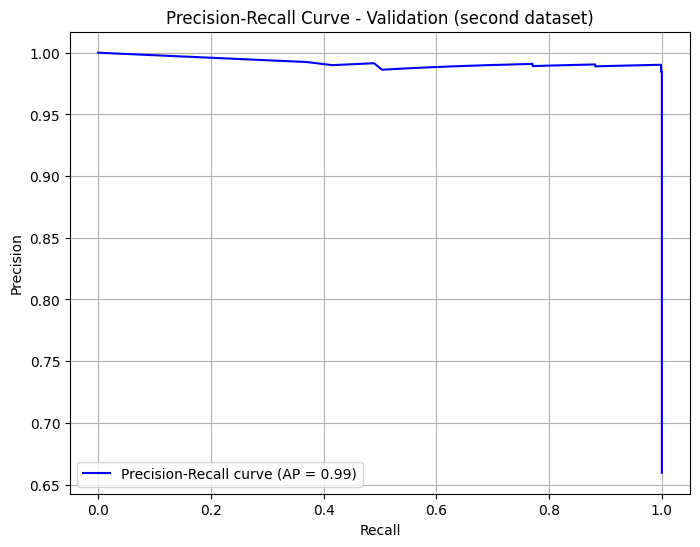

In [44]:
#plot precision-recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

all_probs = []
all_labels = []

with torch.no_grad():
    #for inputs, labels in test_loader:
    for inputs, labels in val_loader:
   # for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1).unsqueeze(-2)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)[:, 1]

        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

precision, recall, _ = precision_recall_curve(all_labels, all_probs)
average_precision = average_precision_score(all_labels, all_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve - Test (first dataset)')
#plt.title('Precision-Recall Curve - Validation (first dataset)')
#plt.title('Precision-Recall Curve - Train (first dataset)')
#plt.title('Precision-Recall Curve - Test (second dataset)')
#plt.title('Precision-Recall Curve - Train (second dataset)')
plt.title('Precision-Recall Curve - Validation (second dataset)')
plt.legend(loc='lower left')
plt.grid()
plt.show()